In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [3]:
digits = datasets.load_digits()

In [4]:
digits.images.shape

(1797, 8, 8)

<Figure size 640x480 with 0 Axes>

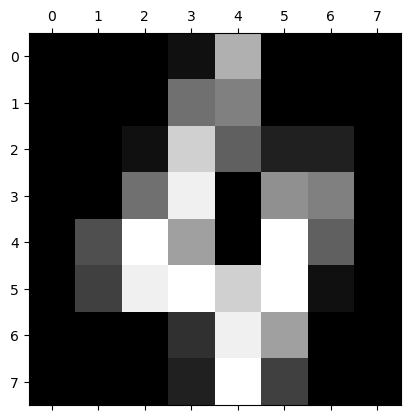

In [5]:
plt.gray()
plt.matshow(digits.images[4,:,:])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
zero_one_target=digits.target[[x in [0,1] for x in digits.target]]
zero_one_images=digits.images[[x in [0,1] for x in digits.target],:,:]
zero_one_images=zero_one_images.reshape(360,-1)

In [8]:
zero_one_target.shape

(360,)

In [9]:
zero_one_images.shape

(360, 64)

In [10]:
image_train, image_test, target_train, target_test = train_test_split(zero_one_images, zero_one_target)

In [11]:
L=LogisticRegression()
L.fit(zero_one_images,zero_one_target)

LogisticRegression()

In [12]:
L.intercept_

array([3.97853217])

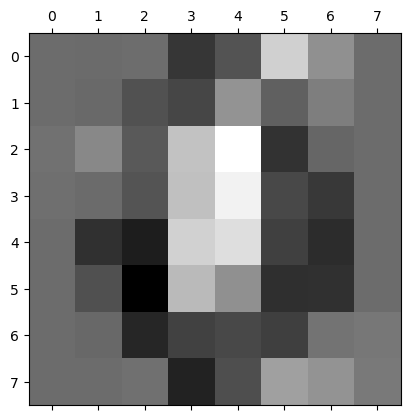

In [18]:
plt.matshow(L.coef_.reshape(8,8))

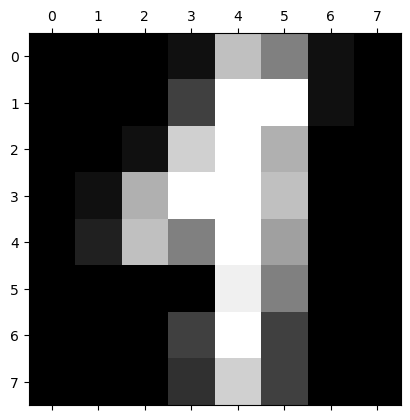

In [14]:
plt.matshow(image_test[0].reshape(8,8))

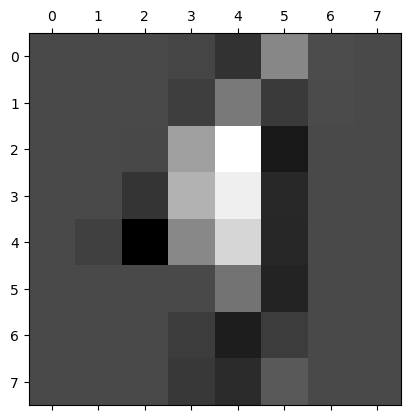

In [15]:
plt.matshow(L.coef_.reshape(8,8) * image_test[0].reshape(8,8)+L.intercept_)

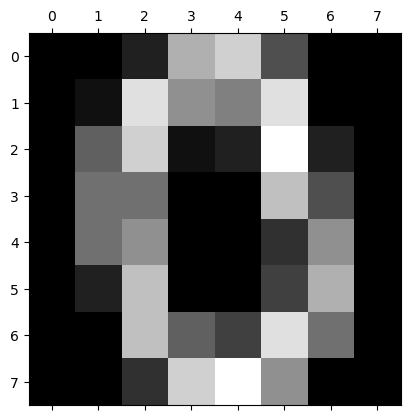

In [16]:
plt.matshow(image_test[1].reshape(8,8))

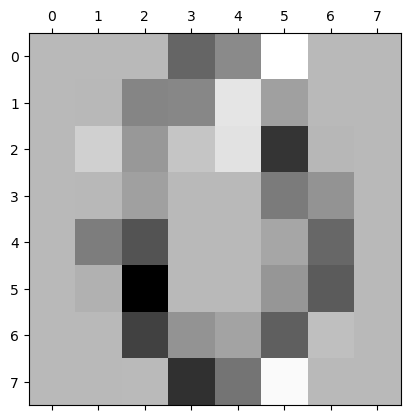

In [17]:
plt.matshow(L.coef_.reshape(8,8) * image_test[1].reshape(8,8)+L.intercept_)

In [19]:
L.score(image_test,target_test)

1.0

In [28]:
d_train, d_test, y_train, y_test = train_test_split(digits.images, digits.target)

In [29]:
E=OneHotEncoder()
train_one_hot = E.fit_transform(y_train.reshape(-1,1))
d_train=d_train.reshape(-1,64)

In [31]:
train_one_hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
L=LogisticRegression(max_iter=10000)

In [33]:
L.fit(d_train/16,y_train)

LogisticRegression(max_iter=10000)

In [34]:
L.score(d_test.reshape(-1,64)/16,y_test)

0.9688888888888889

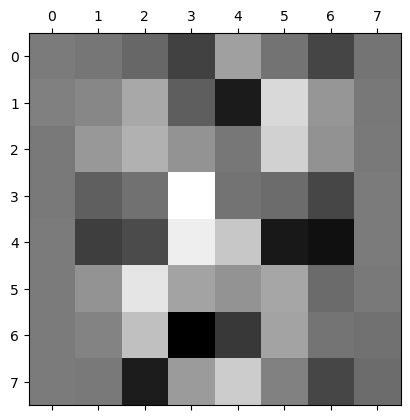

In [128]:
plt.matshow(L.coef_[8].reshape(8,8))

In [134]:
L.predict(d_test.reshape(-1,64)/16)==y_test

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

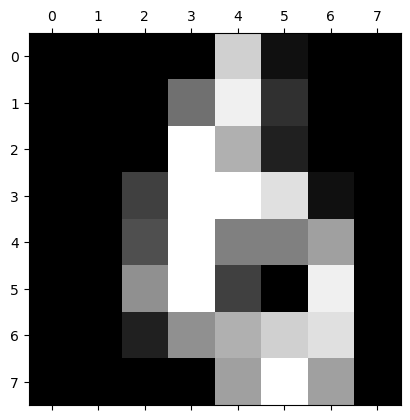

In [136]:
plt.matshow(d_test[1])

In [137]:
y_test[1]

6

In [147]:
L.predict((d_test.reshape(-1,64)/16))

array([8, 1, 8, 8, 5, 8, 9, 6, 8, 6, 6, 1, 0, 3, 1, 5, 4, 7, 0, 5, 4, 2,
       5, 6, 3, 8, 5, 6, 1, 3, 1, 3, 8, 1, 1, 4, 0, 7, 6, 2, 4, 5, 1, 5,
       0, 6, 1, 3, 3, 2, 3, 9, 2, 3, 5, 2, 9, 3, 4, 0, 6, 8, 8, 7, 1, 5,
       2, 4, 2, 1, 8, 0, 9, 8, 2, 4, 5, 7, 4, 5, 9, 6, 4, 7, 2, 9, 9, 9,
       4, 1, 4, 8, 5, 0, 8, 2, 5, 7, 5, 3, 6, 4, 4, 6, 5, 5, 8, 1, 0, 2,
       6, 0, 0, 2, 8, 5, 4, 8, 0, 7, 1, 2, 9, 8, 1, 2, 3, 7, 9, 3, 4, 6,
       5, 9, 7, 5, 9, 0, 5, 0, 7, 8, 6, 1, 7, 2, 4, 2, 3, 2, 1, 0, 7, 0,
       5, 7, 1, 9, 7, 0, 8, 8, 3, 9, 1, 8, 7, 3, 0, 9, 8, 9, 1, 3, 0, 1,
       9, 2, 3, 9, 9, 1, 7, 9, 1, 0, 8, 9, 3, 5, 1, 0, 3, 0, 3, 2, 0, 4,
       0, 2, 7, 7, 5, 5, 0, 9, 6, 8, 9, 2, 5, 6, 6, 9, 4, 1, 8, 4, 7, 0,
       6, 3, 8, 8, 5, 8, 0, 9, 1, 7, 9, 1, 5, 2, 0, 4, 1, 7, 9, 1, 9, 0,
       1, 2, 6, 8, 5, 7, 0, 0, 7, 2, 1, 0, 8, 1, 7, 6, 6, 3, 0, 6, 1, 5,
       5, 1, 0, 0, 9, 2, 2, 0, 6, 4, 0, 5, 0, 8, 8, 2, 6, 2, 8, 1, 7, 4,
       0, 9, 1, 4, 4, 9, 9, 2, 2, 8, 5, 6, 4, 9, 4,

In [142]:
np.set_printoptions(precision=3,suppress=True)

In [144]:
L.predict(d_test.reshape(-1,64)/16[1])

<>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
/tmp/ipykernel_60786/1731302294.py:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  L.predict(d_test.reshape(-1,64)/16[1])
/tmp/ipykernel_60786/1731302294.py:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  L.predict(d_test.reshape(-1,64)/16[1])
/tmp/ipykernel_60786/1731302294.py:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  L.predict(d_test.reshape(-1,64)/16[1])


TypeError: 'int' object is not subscriptable

In [24]:
from scipy.special import softmax

In [27]:
softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])